# Error Analysis on Various Samples

In [1]:
import sample
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from tempfile import NamedTemporaryFile
from IPython.display import HTML

In [2]:
# From: http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [3]:
start = time.time()
samples = sample.get_all_samples()
end = time.time()
print "{:2.2f}s".format(end-start)

21.30s


_ (we should try to minimize this time) _

In [4]:
def get_uncertainty(f,s):
    total = zip(*s)
    stds = map(lambda x: np.std(x), total)
    avgs = map(lambda x: np.average(x), total)
    comb = [(avgs[i], avgs[i]-stds[i], avgs[i]+stds[i]) for i in range(len(avgs))]
    plt.subplot(211)
    plt.plot(f,comb)
    plt.subplot(212)
    plt.plot(f, total)
    plt.show()

In [5]:
def graph_time(path, size=0.1):
    WIDTH = int(30*size)
    samples = sample.Sample.from_file(path).time_divide_samples(size=size)[:-1]

    fig, ax = plt.subplots()

    result = [samples[i].get_data(64) for i in range(len(samples))]

    line, = ax.plot(*result[0])


    def animate(i):
        line.set_data(*result[int(i/WIDTH)])  # update the data
        return line,


    # Init only required for blitting to give a clean slate.
    def init():
        line.set_data([],[])
        return line,

    ani = animation.FuncAnimation(fig, animate, range(WIDTH*len(result)), init_func=init,
                                  interval=500, blit=True)
    display_animation(ani)
    print "wut"

In [6]:
graph_time("data/x-pad/3.wav")

wut


### X-motion with finger pad

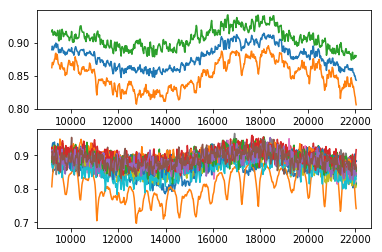

In [7]:
get_uncertainty(*samples["x-pad"])

### X-motion with fingernail

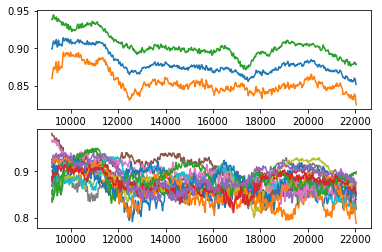

In [8]:
get_uncertainty(*samples["x-nail"])

### O-motion with finger pad

In [9]:
s

NameError: name 's' is not defined

In [ ]:
get_uncertainty(*samples["o-pad"])

### O-motion with fingernail

In [ ]:
get_uncertainty(*samples["o-nail"])

### Swipe down, then back up with finger pad

In [ ]:
get_uncertainty(*samples["swipe_down-pad"])

### Swipe down, then back up with fingernail

In [ ]:
get_uncertainty(*samples["swipe_down-nail"])